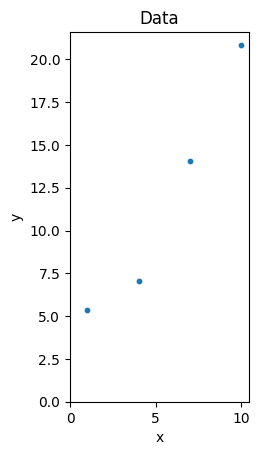

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# generate a small dataset (x,y) with a linear relationship y = a *x and a bit of noise
# set a random seed
np.random.seed(7)
x = np.linspace(1, 10, 4)
y = 2 * x + np.random.normal(0, 2, 4)

# plot the data

plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0, None)
plt.xlim(0, None)
# set x and y to have the same range
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Data')
plt.show()


In [2]:
print(f'x={x}')
print(f'y={y}')

x=[ 1.  4.  7. 10.]
y=[ 5.38105141  7.06812526 14.06564033 20.81503257]


In [3]:
def linear_model(x, w_0):
    # a univariate linear regression model with no intercept
    return w_0 * x


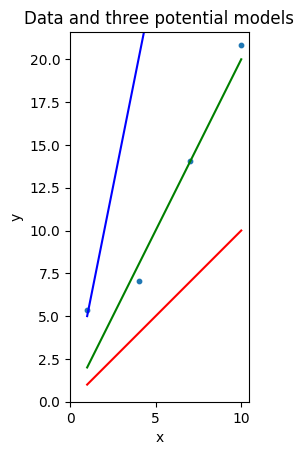

In [4]:
# plot the data and the model, with w_0 = 2 , -2 and 5 (three lines each in a different color)

plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0, None)
plt.xlim(0, None)
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(x, linear_model(x, 2), color='green')
plt.plot(x, linear_model(x, 1), color='red')
plt.plot(x, linear_model(x, 5), color='blue')
plt.title('Data and three potential models')
plt.show()

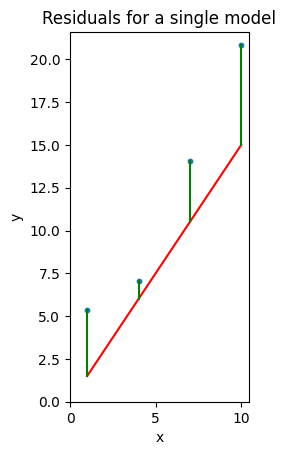

In [5]:
# plot a single line with w_0 = 1 and the residuals (the vertical lines between the data points and the line)

plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0, None)
plt.xlim(0, None)
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(x, linear_model(x, 1.5), color='red')
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], linear_model(x[i], 1.5)], color='green')
plt.title('Residuals for a single model')
plt.show()

In [6]:
def compute_mse(y, y_predicted):
    # compute the mean squared errors (MSE)
    return np.sum((y - y_predicted) ** 2) / len(y)


In [7]:
def w_0_mse(x, y, w_0):
    # for a given w_0 compute the sum of squared errors
    y_predicted = linear_model(x, w_0)
    mse = compute_mse(y, y_predicted)
    return mse

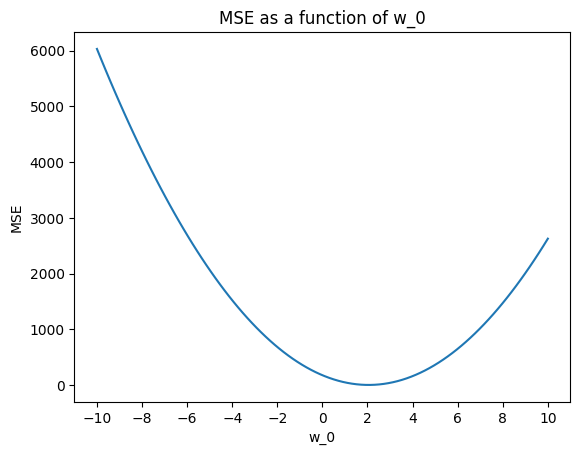

In [8]:
# plot mse as function of w_0
w_0 = np.linspace(-10, 10, 100)
mse = [w_0_mse(x, y, w_0_) for w_0_ in w_0] # list comprehension
plt.plot(w_0, mse)
plt.xlabel('w_0')
plt.ylabel('MSE')
plt.title('MSE as a function of w_0')
plt.xticks(np.arange(-10, 11, 2))
plt.show()


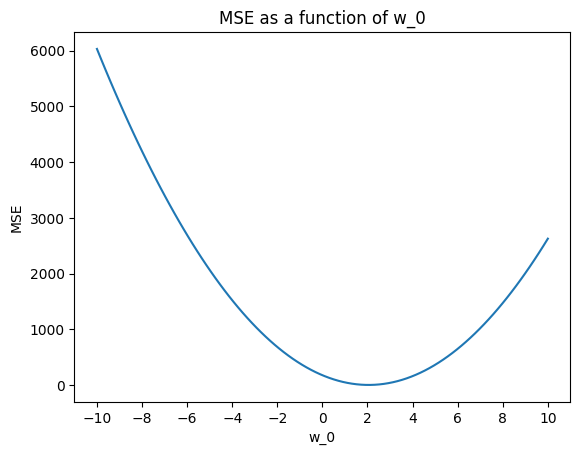

In [9]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the MSE as a function of w_0
w_0 = np.linspace(-10, 10, 100)
mse = [w_0_mse(x, y, w_0_) for w_0_ in w_0]
ax.plot(w_0, mse)

# Set the axis labels and title
ax.set_xlabel('w_0')
ax.set_ylabel('MSE')
ax.set_title('MSE as a function of w_0')

# Set the x-axis ticks
ax.set_xticks(np.arange(-10, 11, 2))

# Display the plot
plt.show()

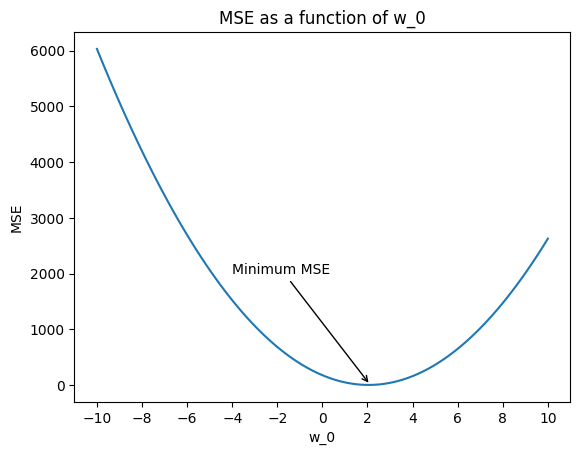

In [10]:
# add an annotation for the minimum MSE
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the MSE as a function of w_0
w_0 = np.linspace(-10, 10, 100)
mse = [w_0_mse(x, y, w_0_) for w_0_ in w_0]
ax.plot(w_0, mse)

# Set the axis labels and title
ax.set_xlabel('w_0')
ax.set_ylabel('MSE')
ax.set_title('MSE as a function of w_0')

# Set the x-axis ticks
ax.set_xticks(np.arange(-10, 11, 2))

min_mse = np.min(mse)
min_mse_w_0 = w_0[np.argmin(mse)]
ax.annotate('Minimum MSE', xy=(min_mse_w_0, min_mse), xytext=(-4, 2000), arrowprops={'arrowstyle': '->'})
plt.show()